# Digital Audio & Fourier Transforms

## How do we represent audio digitally?

In the real world, audio at a point can be thought of as a function of pressure over time.


An electric representation of audio could be the voltage on a guitar cable over time.


How do we we represent a continuous signal digitally?


## Sampling

The Analaog-to-Digital converter (ADC) on digital recording equipment periodically takes a snapshot of what the signal
looks like at evenly spaced intervals of time.

The frequency at which it records the level of the signal is called the _sampling_ rate.

Imagine there is a 1Hz sine wave coming into your computer:

![sampling](sampling.png)

The ADC estimates the amplitude at times 0, 0.2, 0.4, 0.8, and so on.
In audio programming, we essentially deal with getting arrays of these samples as inputs and
producing an array of samples as output that goes to either the next program in the signal chain or to a Digital-to-Analog converter (DAC)
to be sent to a speaker. 
This example is just a simple sine wave, but this process works for any kind of audio.
Audio follows a principle called superposition.
If I had a $f$ coming into my ear from a guitar and signal $g$ coming into my ear from a piano, the sound
that I hear is just $f+g$.

There's a lot of math that shows this works perfectly well as long as we don't try to sample a signal that has frequencies over half of our sampling frequency.
(Nyquist-Shannon-Kotolnikov Sampling Theorem)



But what makes sounds different from each other? If I play a C4 note on the guitar, why does it sound different than the same note on a guitar?

There is more to sound than just the _fundamental_ frequency of the note being played. 
C4 is usually $261.63 Hz$, but the sound that comes from a guitar is comprised of much more than just a single $261.63 Hz$ sine wave.

It turns out that continuous waves are actually made up of multiple sinusoids.
They are usually made up of a strong wave at the fundamental frequency plus a bunch of other waves called _partials_. In tonal instruments, their partials are usually at multiples of the fundamental and are called _harmonics_.

This is kind of what it looks like:

In [9]:
%matplotlib inline

import numpy as np
import numpy.random as nprandom
import scipy.io.wavfile
import scipy.signal
import scipy.fft
import scipy.signal.windows
import matplotlib.pyplot as plt
import IPython
import pdb

plt.rcParams['figure.figsize'] = [24, 12]
plt.style.use('ggplot')
np.set_printoptions(precision=3, suppress=True)

In [10]:
# load up a wav file containing our audio
y2k_sample_rate, year_2000_data = scipy.io.wavfile.read("./audio/year2000.wav")
IPython.display.Audio(data = year_2000_data, rate = y2k_sample_rate)

(0, 10000)

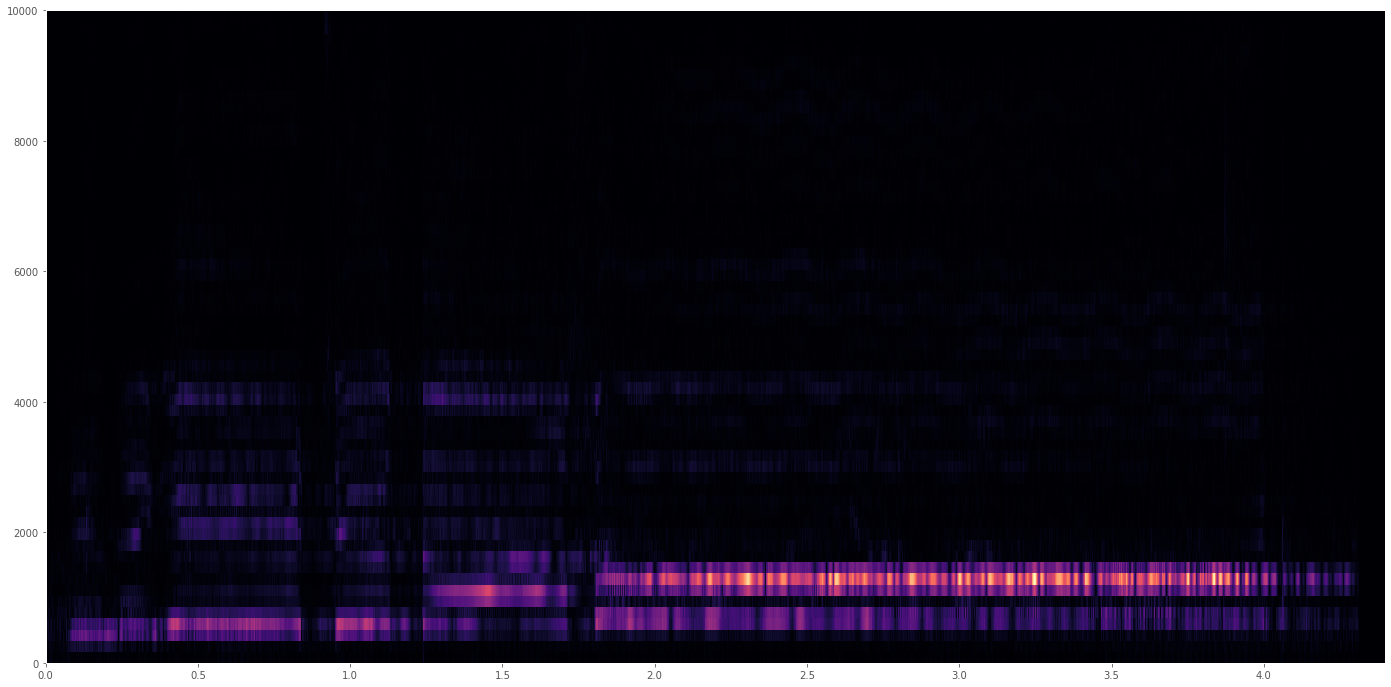

In [11]:
y2k_frequencies, y2k_stft_times, y2k_stft = scipy.signal.stft(year_2000_data, fs=y2k_sample_rate)

# plot the STFT over Time
plt.pcolormesh(y2k_stft_times, y2k_frequencies, np.abs(y2k_stft), cmap=plt.get_cmap('magma'))
plt.ylim(0,10000)

The "notes" that are being sung are the strong low frequencies. You can see the partials that give the voice its unique sound.

## Fourier Transforms

Fourier Transforms are a way that we can analyze the frequencies that make up a signal. The Short Time Fourier Transform above
is a bunch of these Fourier Transforms taken over time.

This is the definition of the Discrete Fouerier Transform (DFT), which we use because we're dealing with discrete, digital samples:

$$
X_k = \sum_{n=0}^{N-1} x_n e^{-i2 \pi kn/N}
$$


Raising $e$ to a complex number can be thought of as doing rotation in the complex plain. 
That is,
$$
e^{i \theta} = \cos{\theta} + i \sin{\theta}
$$

This is called Euler's formula.

So, the DFT essentially just correlates the input signal to a bunch of pure sine and cosine functions of different frequencies and outputs how 
good the match was. What comes out, though is a complex number and could use a little explanation.

Each point of the DFT, $X_k$, can be though of as this:


![](complex_vector.png)

So, complex numbers are realy just points on a plane like this.

Each value in the spectorgram above are complex numbers, but we were graphing the _magnitude_ of them. This is related to how our ears hear sound.

--------------------


Resources:

 - Alan V. Oppenheim, Ronald W. Schafer. Digital Signal Processing. Prentice-Hall of India Private Limited, Connaught Circus, New Delhi (2002).
 - Claude E. Shannon. “Communication in the Presence of Noise.” Proceedings of the IRE, 37 (1949). 10-21.
 - Steven W. Smith. The Scientist and Engineer’s Guide to Digital Signal Processing. California Technical Publishing, San Diego, CA, (1997).
